# Deep Learning and Image Recognition Assignment

## Assignment - ANN Regression - to predict wine quality

### Duo Zhou

Use ANN to make predictions on stuructured data and then increase the complexity of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.utils import to_categorical

Using TensorFlow backend.


### Read Dataset, Describe

In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv -o ../winequality-red.csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv -o ../winequality-white.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 84199  100 84199    0     0  71903      0  0:00:01  0:00:01 --:--:-- 72026
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 24  258k   24 63488    0     0  90438      0  0:00:02 --:--:--  0:00:02 90310
100  258k  100  258k    0     0   276k      0 --:--:-- --:--:-- --:--:--  276k


In [3]:
white_wine = pd.read_csv('../winequality-white.csv', sep=';')
red_wine = pd.read_csv('../winequality-red.csv', sep=';')

In [4]:
# store wine type as an attribute
red_wine['wine_type'] = 0   
white_wine['wine_type'] = 1

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

#Add a new column to convert the wine quality into a categorical variable
wines['quality_label'] = wines['quality'].apply(lambda value: 0 #low
                                                              if value <= 5 else 1 # medium
                                                                  if value <= 7 else 2) #high

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

#inspect data
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,1,2
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,0,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,1,1
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,1,1
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,1,1


In [5]:
#select features and label
X = wines.drop(columns=['quality','quality_label'])
y = wines['quality']

#get number of columns in training data
n_cols = X.shape[1]

In [6]:
y_cat = to_categorical(y)
y_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## Build Models

In [7]:
#set early stopping monitor so the model stops training when it won't improve anymore
EPOCHS = 20
early_stopping_monitor = EarlyStopping(patience=3)

In [8]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X.shape[1]

#add layers to model
model.add(Dense(20, activation='sigmoid', input_shape=(n_cols,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [9]:
n_cols

12

In [10]:
my_callbacks = [
    EarlyStopping(patience=2),
    #ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    #TensorBoard(log_dir='logs'),
]

In [11]:
#train model
history = model.fit(X, y_cat, epochs=50, validation_split=0.2, callbacks=my_callbacks)

Train on 5197 samples, validate on 1300 samples
Epoch 1/50
5197/5197 [==============================] - 3s 496us/step - loss: 1.5688 - accuracy: 0.3548 - val_loss: 1.2879 - val_accuracy: 0.4362
Epoch 2/50
5197/5197 [==============================] - 0s 40us/step - loss: 1.2829 - accuracy: 0.4366 - val_loss: 1.2739 - val_accuracy: 0.4362
Epoch 3/50
5197/5197 [==============================] - 0s 40us/step - loss: 1.2761 - accuracy: 0.4379 - val_loss: 1.2638 - val_accuracy: 0.4362
Epoch 4/50
5197/5197 [==============================] - 0s 40us/step - loss: 1.2623 - accuracy: 0.4416 - val_loss: 1.2512 - val_accuracy: 0.4454
Epoch 5/50
5197/5197 [==============================] - 0s 43us/step - loss: 1.2427 - accuracy: 0.4480 - val_loss: 1.2548 - val_accuracy: 0.4508
Epoch 6/50
5197/5197 [==============================] - 0s 44us/step - loss: 1.2269 - accuracy: 0.4568 - val_loss: 1.2141 - val_accuracy: 0.4500
Epoch 7/50
5197/5197 [==============================] - 0s 40us/step - loss: 1.20

Text(0.5, 1.0, 'Loss Curves')

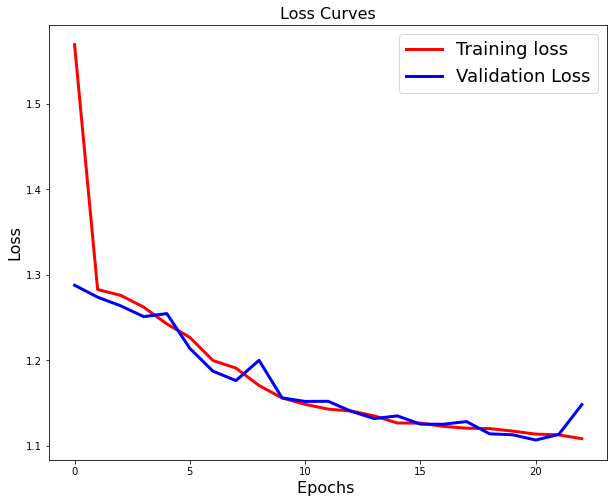

In [12]:
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)